In [13]:
import argparse
import pickle
import sys
import tomllib
import os
import datetime
import gvar as gv
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

sys.path.append('/Users/pietro/code/software/B2heavy/')
from routines.fit_2pts_dispersion_relation import format_energies
from routines.fit_2pts_dispersion_relation import fit_dispersion_relation
from routines.fit_2pts_dispersion_relation import plot_dispersion_relation

from b2heavy.TwoPointFunctions.types2pts import CorrelatorIO, Correlator
from b2heavy.TwoPointFunctions.fitter import CorrFitter

In [2]:
ens = 'Coarse-1'
mes = 'Dst'
MOM_LIST = ['000','100','200','300','110','211']

In [3]:
def load_toml(file) -> dict:
    with open(file,'rb') as f:
        toml_data: dict = tomllib.load(f)
    return toml_data

config = load_toml('/Users/pietro/code/software/B2heavy/routines/2pts_fit_config.toml')

In [5]:
E = {}
for mom in MOM_LIST:
    io = CorrelatorIO(ens,mes,mom,PathToDataDir='/Users/pietro/code/data_analysis/BtoD/Alex/')
    corr = Correlator(io,jkBin=9)

    trange = config['fit'][ens][mes]['mom'][mom]['trange']
    smslist = config['fit'][ens][mes]['smlist']
    NEXC = config['fit'][ens][mes]['nstates']

    _,MEFF,AEFF,_,_ = corr.EffectiveCoeff(trange,smearing=smslist)

    fitter = CorrFitter(corr,smearing=smslist)
    fitter.fit(
        Nstates = NEXC,
        trange  = tuple(trange),
        verbose = True,
        pval    = True,
        jkfit   = False,
        priors  = fitter.set_priors_phys(NEXC,Meff=MEFF,Aeff=AEFF)
    )

    E[mom] = fitter.fits[NEXC,tuple(trange)].p['E'][0]



/Users/pietro/opt/anaconda3/envs/stat/lib/python3.11/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


---------- 3+3 fit in (12, 17) for mes: Dst of ens: Coarse-1 for mom: 000 --------------
 De-augmented chi2 = 2.7052561364079635 with p-value = 0.0
Least Square Fit:
  chi2/dof [dof] = 0.24 [18]    Q = 1    logGBF = 339.85

Parameters:
            E 0     1.0807 (27)      [ 1.0812 (30) ]  
              1      -2.03 (50)      [  -1.81 (58) ]  
              2      -1.43 (62)      [  -1.09 (80) ]  
              3      -3.4 (2.2)      [  -2.4 (2.5) ]  
              4      -1.7 (1.3)      [  -2.4 (2.5) ]  
              5      -1.37 (86)      [  -2.4 (2.5) ]  
   Z_1S_Unpol 0      0.404 (24)      [   0.4 (1.2) ]  
              1      -1.1 (1.2)      [  -1.2 (1.2) ]  
              2       0.76 (84)      [   0.5 (1.5) ]  
              3       0.79 (51)      [   0.5 (1.5) ]  
              4       0.3 (3.0)      [   0.5 (3.0) ]  
              5       0.2 (3.0)      [   0.5 (3.0) ]  
 Z_d-1S_Unpol 0     0.03 (1.59)      [   0.5 (1.7) ]  
              1       0.03 (67)      [   0.5 (1.7

/Users/pietro/opt/anaconda3/envs/stat/lib/python3.11/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


 De-augmented chi2 = 2.267748001028974 with p-value = 0.0
Least Square Fit:
  chi2/dof [dof] = 0.18 [24]    Q = 1    logGBF = 407.67

Parameters:
            E 0   1.0932 (32)     [ 1.0953 (37) ]  
              1    -2.16 (49)     [  -1.81 (58) ]  
              2    -1.34 (59)     [  -1.09 (80) ]  
              3    -3.5 (2.3)     [  -2.4 (2.5) ]  
              4    -1.8 (1.4)     [  -2.4 (2.5) ]  
              5    -1.6 (1.7)     [  -2.4 (2.5) ]  
     Z_1S_Bot 0    0.319 (25)     [   0.3 (1.2) ]  
              1    -1.1 (1.2)     [  -1.2 (1.2) ]  
              2     0.4 (1.2)     [   0.5 (1.5) ]  
              3     0.77 (54)     [   0.5 (1.5) ]  
              4     0.4 (3.0)     [   0.5 (3.0) ]  
              5     0.9 (2.3)     [   0.5 (3.0) ]  
     Z_1S_Par 0    0.337 (23)     [   0.3 (1.2) ]  
              1    -1.0 (1.2)     [  -1.2 (1.2) ]  
              2     0.3 (1.4)     [   0.5 (1.5) ]  
              3     0.64 (50)     [   0.5 (1.5) ]  
              4     0.

/Users/pietro/opt/anaconda3/envs/stat/lib/python3.11/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


 De-augmented chi2 = 29.255006764045973 with p-value = 0.0024920635149828165
Least Square Fit:
  chi2/dof [dof] = 0.68 [48]    Q = 0.96    logGBF = 873.17

Parameters:
            E 0     1.1437 (25)      [ 1.1448 (26) ]  
              1      -2.36 (42)      [  -1.81 (58) ]  
              2      -1.31 (65)      [  -1.09 (80) ]  
              3      -2.8 (1.4)      [  -2.4 (2.5) ]  
              4      -2.0 (1.9)      [  -2.4 (2.5) ]  
              5      -1.6 (1.7)      [  -2.4 (2.5) ]  
     Z_1S_Bot 0      0.184 (19)      [   0.1 (1.2) ]  
              1      -0.11 (45)      [  -1.2 (1.2) ]  
              2       0.2 (1.3)      [   0.5 (1.5) ]  
              3       0.5 (1.2)      [   0.5 (1.5) ]  
              4       0.3 (2.8)      [   0.5 (3.0) ]  
              5       0.6 (2.4)      [   0.5 (3.0) ]  
     Z_1S_Par 0      0.247 (25)      [   0.3 (1.2) ]  
              1      -1.0 (1.1)      [  -1.2 (1.2) ]  
              2       0.7 (1.3)      [   0.5 (1.5) ]  
       

/Users/pietro/opt/anaconda3/envs/stat/lib/python3.11/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


 De-augmented chi2 = 4.642121631745437 with p-value = 0.0
Least Square Fit:
  chi2/dof [dof] = 0.36 [24]    Q = 1    logGBF = 375.87

Parameters:
            E 0     1.2067 (58)      [ 1.2102 (61) ]  
              1      -2.57 (41)      [  -1.81 (58) ]  *
              2      -1.17 (68)      [  -1.09 (80) ]  
              3      -4.0 (2.3)      [  -2.4 (2.5) ]  
              4      -1.9 (2.1)      [  -2.4 (2.5) ]  
              5      -1.02 (64)      [  -2.4 (2.5) ]  
     Z_1S_Bot 0     -0.112 (38)      [  -0.2 (1.2) ]  
              1      -0.9 (1.2)      [  -1.2 (1.2) ]  
              2       0.2 (1.4)      [   0.5 (1.5) ]  
              3       0.89 (34)      [   0.5 (1.5) ]  
              4       0.2 (2.9)      [   0.5 (3.0) ]  
              5       1.5 (1.9)      [   0.5 (3.0) ]  
     Z_1S_Par 0      0.054 (38)      [ 0.04 (1.20) ]  
              1      -1.2 (1.2)      [  -1.2 (1.2) ]  
              2       0.3 (1.4)      [   0.5 (1.5) ]  
              3       0.62 (

/Users/pietro/opt/anaconda3/envs/stat/lib/python3.11/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


 De-augmented chi2 = 4.155207779114988 with p-value = 0.24685608155435745
Least Square Fit:
  chi2/dof [dof] = 0.37 [24]    Q = 1    logGBF = 436.04

Parameters:
            E 0     1.1204 (23)      [ 1.1215 (25) ]  
              1      -2.55 (32)      [  -1.81 (58) ]  *
              2      -1.82 (47)      [  -1.09 (80) ]  
              3      -2.4 (1.8)      [  -2.4 (2.5) ]  
              4      -1.09 (75)      [  -2.4 (2.5) ]  
              5      -2.1 (1.6)      [  -2.4 (2.5) ]  
   Z_1S_Unpol 0      0.342 (21)      [   0.3 (1.2) ]  
              1      -0.24 (19)      [  -1.2 (1.2) ]  
              2       0.37 (46)      [   0.5 (1.5) ]  
              3     0.09 (1.44)      [   0.5 (1.5) ]  
              4       0.3 (3.0)      [   0.5 (3.0) ]  
              5     0.05 (2.96)      [   0.5 (3.0) ]  
 Z_d-1S_Unpol 0   0.005 (1.649)      [   0.5 (1.7) ]  
              1     0.02 (1.63)      [   0.5 (1.7) ]  
              2       1.1 (1.4)      [   0.5 (1.7) ]  
            

/Users/pietro/opt/anaconda3/envs/stat/lib/python3.11/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


 De-augmented chi2 = 1.1727480835196151 with p-value = 0.0
Least Square Fit:
  chi2/dof [dof] = 0.32 [12]    Q = 0.99    logGBF = 187.83

Parameters:
            E 0   1.1726 (44)     [ 1.1746 (49) ]  
              1    -2.42 (41)     [  -1.81 (58) ]  *
              2    -1.02 (70)     [  -1.09 (80) ]  
              3    -2.2 (2.4)     [  -2.4 (2.5) ]  
              4    -2.3 (2.5)     [  -2.4 (2.5) ]  
              5    -2.2 (2.5)     [  -2.4 (2.5) ]  
   Z_1S_Unpol 0    0.108 (29)     [ 0.05 (1.20) ]  
              1    -0.11 (27)     [  -1.2 (1.2) ]  
              2     0.5 (1.3)     [   0.5 (1.5) ]  
              3     0.2 (1.4)     [   0.5 (1.5) ]  
              4     0.6 (2.7)     [   0.5 (3.0) ]  
              5     0.1 (2.9)     [   0.5 (3.0) ]  
 Z_d-1S_Unpol 0   0.04 (1.45)     [   0.5 (1.7) ]  
              1   0.06 (1.09)     [   0.5 (1.7) ]  
              2   0.09 (1.53)     [   0.5 (1.7) ]  
              3   0.07 (1.44)     [   0.5 (1.7) ]  
    Z_d_Unpol 0  

In [22]:
MOM,p2,e0 = format_energies(E)
print(MOM)
print(e0)

['000', '100', '110', '200', '211', '300']
[1.0807(27) 1.0932(32) 1.1204(23) 1.1437(25) 1.1726(44) 1.2067(58)]


In [30]:
tofit = ['000','100','200','300']

mom = [m for m in MOM if m in tofit]
E0 = np.array([e for i,e in enumerate(e0) if MOM[i] in tofit])

pars,chi2 = fit_dispersion_relation(mom,E0)


/Users/pietro/code/software/B2heavy/routines/fit_2pts_dispersion_relation.py:97: OptimizeWarning: Covariance of the parameters could not be estimated
  popt,pcov = curve_fit(


ValueError: x and y must be the same size

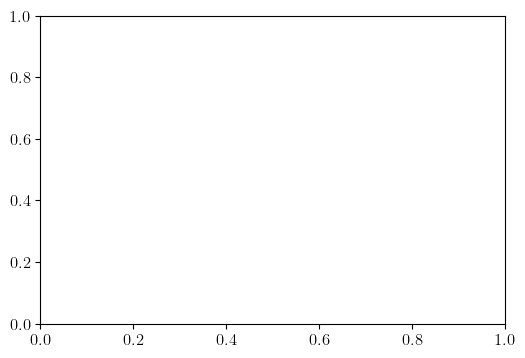

In [32]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12
plt.figure(figsize=(6, 4))
ax = plt.subplot(1,1,1)

plot_dispersion_relation(ax,mom,p2,E0,fitpar=pars,chi2=chi2)

ax.legend()
ax.grid(alpha=0.2)

ax.set_ylabel(r'$a^2 E^2(\mathbf{p})$')
ax.set_xlabel(r'$a^2\mathbf{p}^2$')

ax.set_xlim(xmin=-0.1)

plt.tight_layout()

In [15]:
len(Npoint)

8.108958008410475